## Importando bibliotecas e base de dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression

In [2]:
data_url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(data_url)

In [3]:
df.columns = df.columns.str.upper()
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


## Limpando o dataset

Esse Dataset foi originalmente publicado nos anos 1970 como parte de um estudo sobre a relação entre o valor das casas e diversos fatores socioeconômicos e ambientais em Boston, Massachusetts.

● CRIM: Taxa de criminalidade per capita.

● ZN: Proporção de terrenos residenciais com lotes acima de 25.000 pés quadrados.

● INDUS: Proporção de acres destinados a negócios não varejistas.

● CHAS: Variável indicadora de proximidade ao rio Charles (1 se próximo; 0 caso
contrário).

● NOX: Concentração de óxidos de nitrogênio.

● RM: Média de quartos por residência.

● AGE: Proporção de unidades construídas antes de 1940.

● DIS: Distância ponderada a cinco centros de emprego em Boston.

● RAD: Índice de acessibilidade às rodovias radiais.

● TAX: Taxa de imposto predial.

● PTRATIO: Proporção de alunos por professor.

● LSTAT: Percentual da população de classe baixa.

● MEDV: Preço médio das casas (variável-alvo).

In [4]:
df.drop('B', axis=1, inplace=True) ## Removendo coluna problemática

In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


- Valores duplicados

In [6]:
df.duplicated().sum()

0

- Valores nulos

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


Dado que algumas colunas do dataset possuem 20 valores nulos em um total de 506 registros (aproximadamente 4% dos dados), a estratégia de imputação por média foi escolhida. Esta abordagem é simples e eficaz, especialmente quando a proporção de valores nulos é relativamente baixa. A imputação por média ajuda a manter a distribuição geral dos dados sem introduzir viés significativo, garantindo que a análise e a performance do modelo de regressão não sejam prejudicadas.

In [8]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

imputer = SimpleImputer(strategy='mean')
train_df = pd.DataFrame(imputer.fit_transform(train_df), columns=train_df.columns)
test_df = pd.DataFrame(imputer.transform(test_df), columns=test_df.columns)

print(train_df.isnull().sum())
print(test_df.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64


Para garantir uma avaliação justa do modelo preditivo e evitar a introdução de viés nos dados de teste, o dataset foi dividido em conjuntos de treino e teste antes da análise exploratória dos dados (EDA) e das transformações. A divisão foi feita na proporção de 80% para treino e 20% para teste.

In [9]:
combined_df = pd.concat([train_df, test_df], ignore_index=True)
combined_df.to_csv('processed_data.csv', index=False)

## Análise exploratória dos dados

In [ ]:
train_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.609125,11.569307,10.985050,0.071782,0.556484,6.315891,68.556436,3.808195,9.356436,404.032178,18.318317,12.457351,22.796535
std,8.875058,23.152481,6.894618,0.258447,0.117704,0.709452,27.994922,2.131226,8.589721,166.172655,2.228701,7.110381,9.332147
min,0.009060,0.000000,0.740000,0.000000,0.385000,3.863000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.081437,0.000000,5.130000,0.000000,0.452000,5.890500,45.550000,2.087875,4.000000,279.000000,16.800000,6.772500,16.950000
50%,0.261390,0.000000,8.560000,0.000000,0.538000,6.210000,77.700000,3.175750,5.000000,330.000000,18.700000,10.925000,21.600000
75%,3.202962,20.000000,18.100000,0.000000,0.631000,6.636750,93.650000,5.400800,12.000000,666.000000,20.200000,16.372500,26.400000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


O preço médio dos imóveis (MEDV) é 22.8 mil dólares, com assimetria leve à direita. Variáveis como CRIM (taxa de criminalidade) e TAX (imposto predial) aparentam apresentar outliers significativos, sugerindo possível necessidade de transformação. Apenas 7% das casas estão próximas ao rio (CHAS = 1). A acessibilidade às rodovias (RAD) e a distância a centros de emprego (DIS) mostram alta variação. A mediana e a média de algumas variáveis indicam distribuições assimétricas, como CRIM, que tem uma média bem maior que a mediana devido a bairros com criminalidade extrema.

- Distribuição

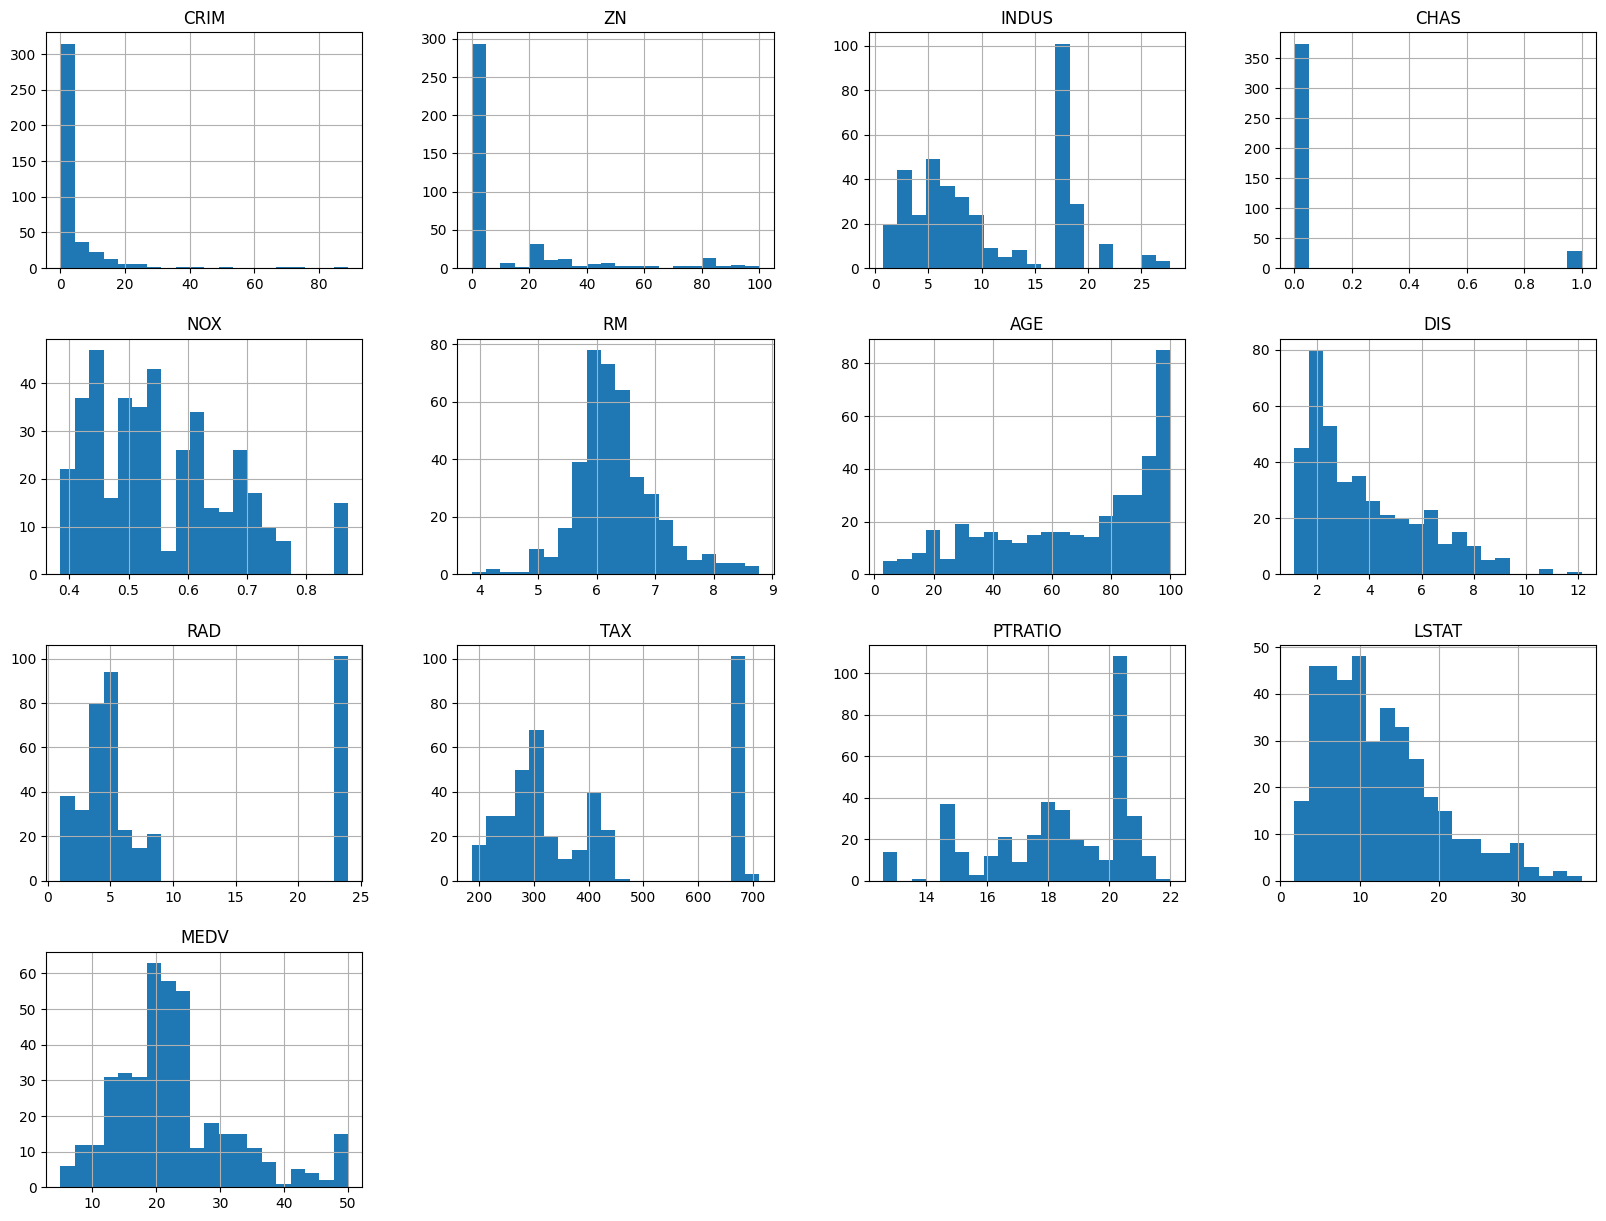

In [ ]:
train_df.hist(bins=20, figsize=(20,15))
plt.show()

Os histogramas mostram padrões importantes nas distribuições das variáveis. CRIM, ZN, RAD e TAX possuem distribuições altamente assimétricas à direita, sugerindo a presença de outliers e possíveis transformações logarítmicas para melhorar a modelagem. RM e MEDV apresentam distribuições aproximadamente normais, o que favorece a regressão linear. DIS e LSTAT têm assimetrias leves, mas com caudas longas, indicando variabilidade significativa. CHAS é uma variável binária, com a maioria dos valores sendo zero, reforçando seu papel como um fator categórico.

- Boxplot

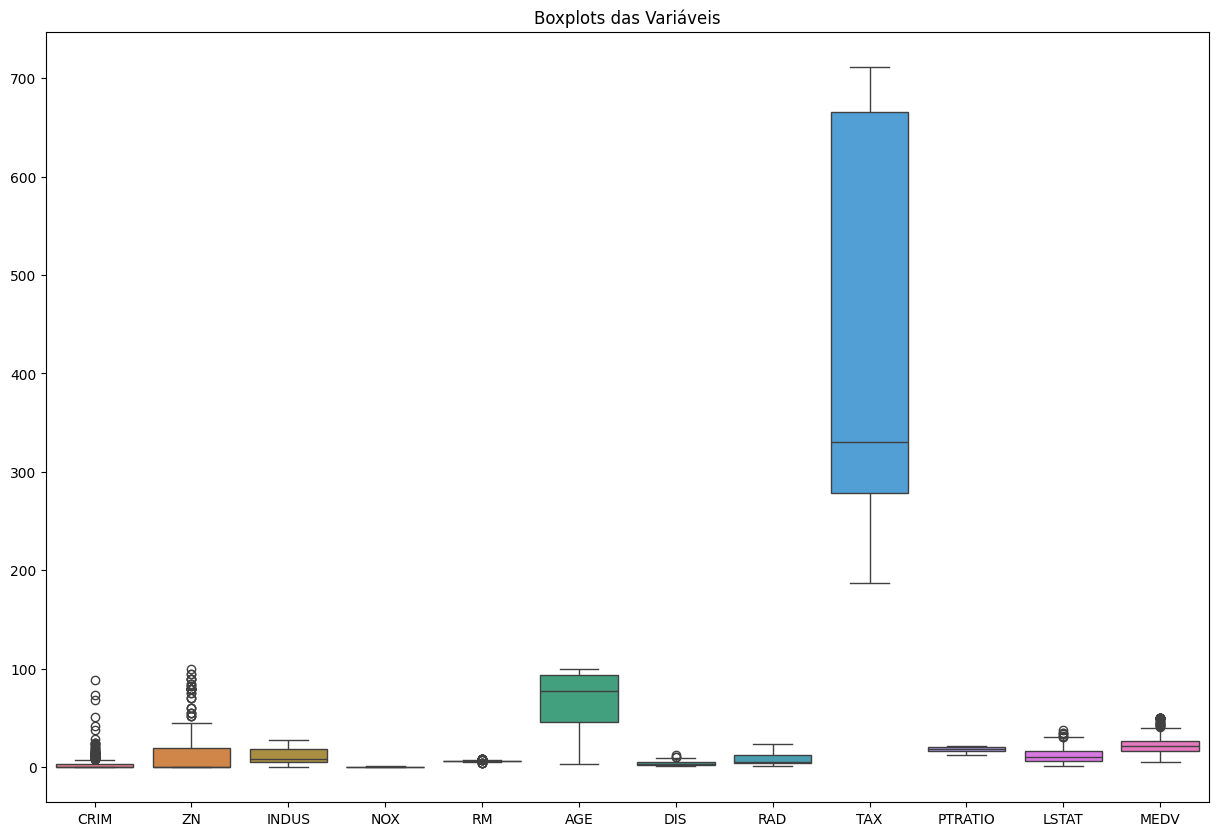

In [ ]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=train_df.drop(columns=['CHAS']))
plt.title('Boxplots das Variáveis')
plt.show()

Os boxplots revela a presença de outliers significativos em variáveis como CRIM, ZN, RAD e TAX, indicando a necessidade de um possível tratamento. Algumas variáveis, como CRIM e LSTAT, apresentam distribuições altamente assimétricas, sugerindo transformações como logaritmo para normalização. O imposto predial (TAX) mostra grande variabilidade, o que pode impactar a estabilidade dos modelos de regressão. Além disso, o preço médio das casas (MEDV) contém valores extremos que podem indicar bairros com preços muito acima ou abaixo da média. Por outro lado, variáveis como NOX e RM possuem distribuições mais concentradas, sugerindo menor variabilidade.

- Correlação

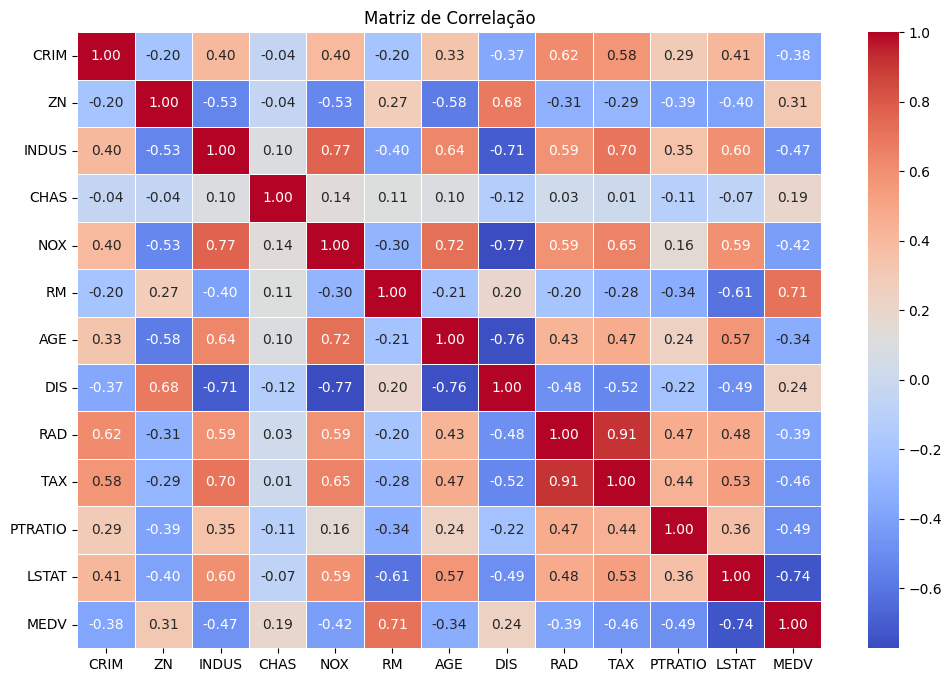

In [ ]:
corr_matrix = train_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

A média de quartos por residência (RM) mostra uma forte correlação positiva com o preço médio das casas (MEDV), indicando que regiões que possuem em média casas com mais quartos tendem a ter um maior MEDV. A taxa de imposto predial (TAX) também tem uma correlação positiva muito forte com o índice de acessibilidade às rodovias radiais (RAD), sugerindo que áreas com melhor acesso por rodovias possuem impostos mais altos. Adicionalmente, a concentração de óxidos de nitrogênio (NOX) correlaciona-se positivamente com a proporção de acres destinados a negócios não varejistas (INDUS), mostrando que áreas mais industriais tendem a ter níveis mais altos de poluição.

O percentual da população de classe baixa (LSTAT) possui uma correlação negativa forte com o preço médio das casas (MEDV), indicando que áreas com maior presença de população de classe baixa tendem a ter preços de imóveis mais baixos. A distância ponderada a cinco centros de emprego em Boston (DIS) mostra uma correlação negativa forte com a concentração de óxidos de nitrogênio (NOX), sugerindo que áreas mais afastadas dos centros de emprego tendem a ser menos poluídas. Por fim, a proporção de acres destinados a negócios não varejistas (INDUS) tem uma correlação negativa com a distância aos centros de emprego (DIS), indicando que áreas industriais são geralmente mais próximas dos centros de emprego.

## Preparação final para modelo

- Transformação de Outliers

In [ ]:
variables_to_transform = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'LSTAT']
for var in variables_to_transform:
    train_df[var] = np.log1p(train_df[var])
    test_df[var] = np.log1p(test_df[var])

A transformação logarítmica foi aplicada nas variáveis continuas para reduzir a assimetria das distribuições, uma vez que essas variáveis apresentaram distribuições altamente inclinadas, o que poderia afetar negativamente a performance dos modelos de regressão. Utilizou-se np.log1p() para garantir que valores zero não causassem problemas, e a transformação foi feita nos dados de treino primeiro, sendo replicada nos dados de teste para manter a consistência. Essa abordagem visa melhorar a normalidade dos dados, reduzir a influência de outliers e aprimorar a estabilidade e a performance dos modelos.

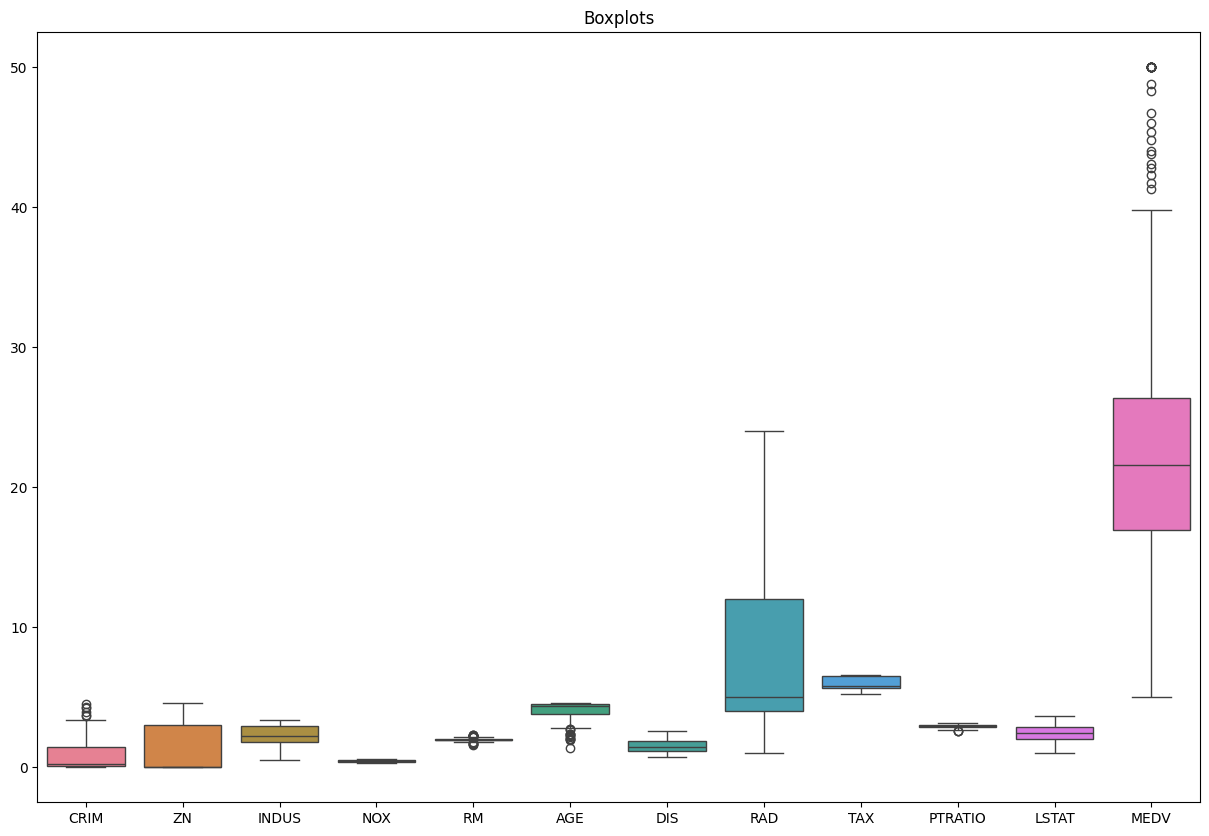

In [ ]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=train_df.drop(columns=['CHAS']))
plt.title('Boxplots')
plt.show()

Mesmo após a aplicação da transformação logarítmica nas variáveis, os dados ainda apresentam a presença de outliers que podem impactar negativamente a performance do modelo. A transformação logarítmica ajudou a suavizar a assimetria das distribuições, mas não foi suficiente para remover completamente os outliers. Para lidar com isso, a estratégia adotada é a aplicação de Winsorization, que limita os valores extremos a um intervalo dentro do qual os dados são considerados válidos e representativos.

In [ ]:
limits = {}
for var in variables_to_transform:
    Q1 = train_df[var].quantile(0.25)
    Q3 = train_df[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    limits[var] = (lower_bound, upper_bound)

    train_df[var] = np.where(train_df[var] < lower_bound, lower_bound, train_df[var])
    train_df[var] = np.where(train_df[var] > upper_bound, upper_bound, train_df[var])

    test_df[var] = np.where(test_df[var] < lower_bound, lower_bound, test_df[var])
    test_df[var] = np.where(test_df[var] > upper_bound, upper_bound, test_df[var])

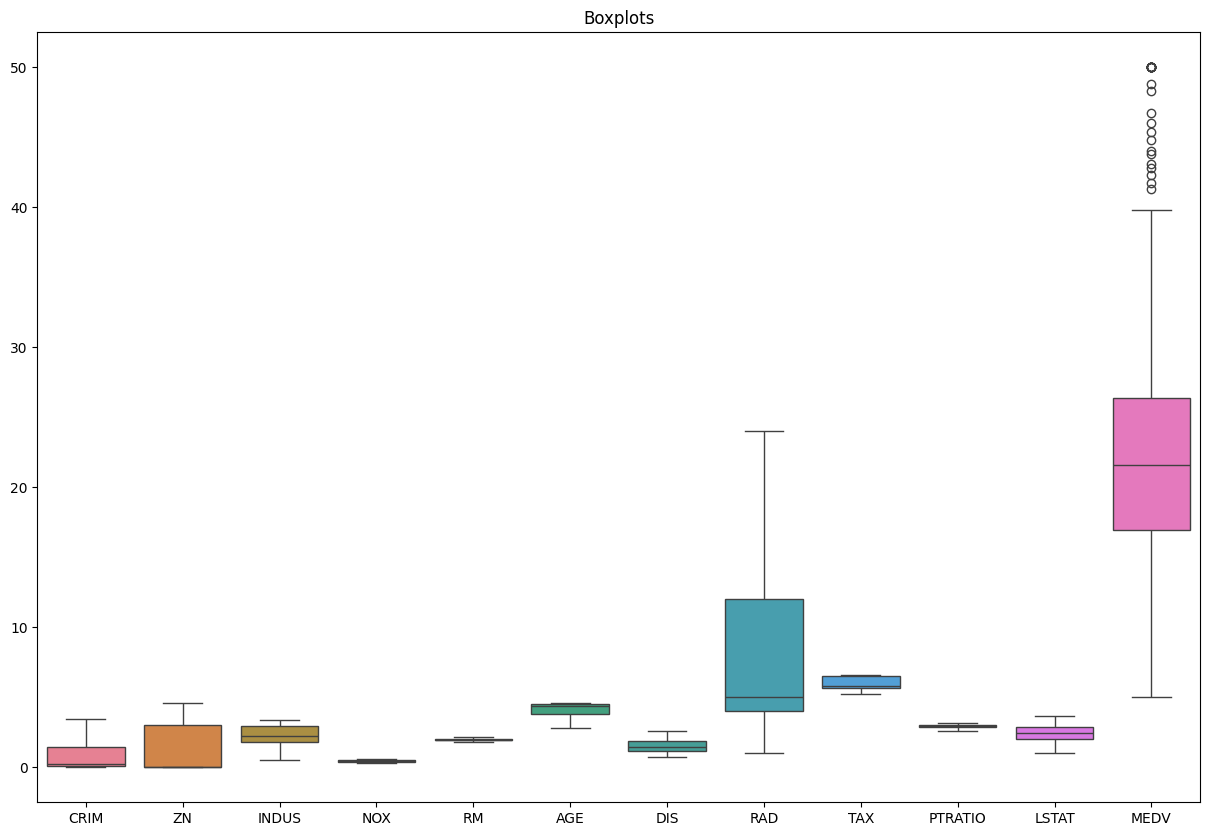

In [ ]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=train_df.drop(columns=['CHAS']))
plt.title('Boxplots')
plt.show()

- Feature Selection

In [ ]:
X_train = train_df.drop(columns=['MEDV'])
y_train = train_df['MEDV']

# Criar e treinar o modelo de Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Obter a importância das variáveis
feature_importance = pd.Series(rf_model.feature_importances_, index=X_train.columns)
feature_importance = feature_importance.sort_values(ascending=False)

# Selecionar as variáveis mais importantes
selected_features = feature_importance[feature_importance > 0.05].index  # Exemplo: selecionar características com importância > 0.05
print(f"Variáveis selecionadas: {selected_features}")

X_train_selected = X_train[selected_features]
X_test_selected = test_df[selected_features]


Variáveis selecionadas: Index(['RM', 'LSTAT', 'DIS'], dtype='object')


In [ ]:
# Seleção das 5 melhores variáveis
selector = SelectKBest(score_func=f_regression, k=5)
X_train_selected_kbest = selector.fit_transform(X_train, y_train)

# Variáveis selecionadas
selected_features_kbest = X_train.columns[selector.get_support()]
print(f"Características selecionadas com SelectKBest: {selected_features_kbest}")

# Aplicar a seleção no conjunto de teste
X_train_selected_kbest = pd.DataFrame(X_train_selected_kbest, columns=selected_features_kbest)
X_test_selected_kbest = pd.DataFrame(X_test_selected_kbest, columns=selected_features_kbest)

Características selecionadas com SelectKBest: Index(['CRIM', 'INDUS', 'RM', 'PTRATIO', 'LSTAT'], dtype='object')


# Implementação com Feature Selection

- Colunas selecionadas por Random Forest

In [ ]:
model = LinearRegression()
model.fit(X_train_selected, y_train)

y_pred = model.predict(X_test_selected)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 23.701432662551493
R² Score: 0.6768006280170326


In [ ]:
coef_df = pd.DataFrame({'Variável': X_train_selected.columns, 'Coeficiente': model.coef_})
print(coef_df.sort_values(by='Coeficiente', ascending=False))

  Variável  Coeficiente
0       RM    26.522457
2      DIS    -3.974403
1    LSTAT   -12.662946


- Colunas selecioandas pelo kbest

In [ ]:
model = LinearRegression()
model.fit(X_train_selected_kbest, y_train)

y_pred = model.predict(X_test_selected_kbest)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 21.883463851272396
R² Score: 0.7015909597431981


In [ ]:
coef_df = pd.DataFrame({'Variável': X_train_selected_kbest.columns, 'Coeficiente': model.coef_})
print(coef_df.sort_values(by='Coeficiente', ascending=False))

  Variável  Coeficiente
2       RM    28.238373
1    INDUS     1.059939
0     CRIM    -0.417576
4    LSTAT    -9.997486
3  PTRATIO   -14.499611


KBest resultou em um MSE menor e um R² Score maior, indicando que o modelo capturou melhor a variabilidade dos dados com essas características. A inclusão de mais colunas pelo KBest forneceu um conjunto de variáveis mais robusto e relevante para a previsão.

# Implementação com todas as variáveis

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 17.308084239219852
R² Score: 0.7639821171999164


In [ ]:
coef_df = pd.DataFrame({'Variável': X_train.columns, 'Coeficiente': model.coef_})
print(coef_df.sort_values(by='Coeficiente', ascending=False))

   Variável  Coeficiente
5        RM    19.553184
3      CHAS     2.651910
6       AGE     0.383045
8       RAD     0.346945
1        ZN     0.032133
2     INDUS    -0.587011
0      CRIM    -2.421711
9       TAX    -4.032628
7       DIS    -8.912325
11    LSTAT   -10.209122
10  PTRATIO   -16.219483
4       NOX   -25.028602


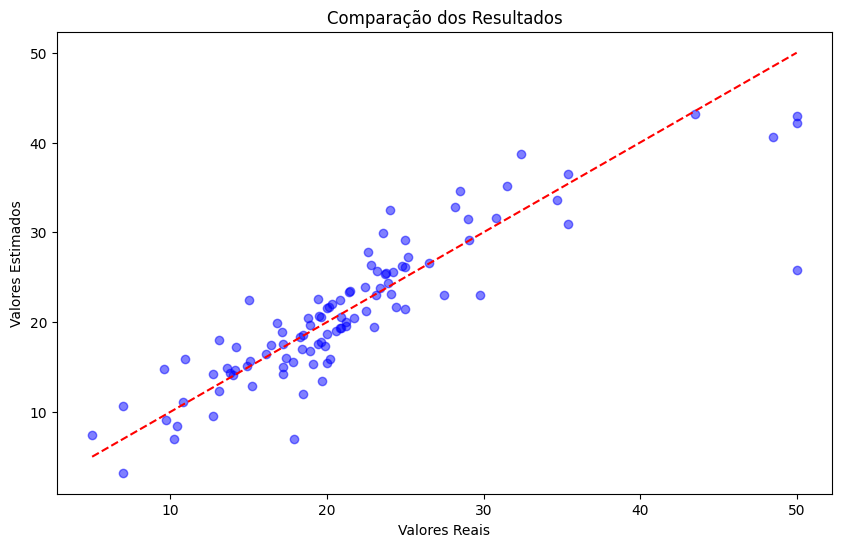

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Estimados')
plt.title('Comparação dos Resultados')
plt.show()


- Aplicando Regularização

In [ ]:
ridge = Ridge()
param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0]}
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_ridge_model = grid_search.best_estimator_

y_pred = best_ridge_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 17.366725140670052
R² Score: 0.7631824734487955


- Implementeção com Ajuste de Hiperparâmetros

In [ ]:
model = LinearRegression()

param_grid = {}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 17.308084239219852
R² Score: 0.7639821171999164


- Após termos feito todos os devidos tratamentos, foi possível obter valores relativamente bons com a regressão.
- Fizemos testes treinando o modelo com todas as colunas tratadas, bem como após a realização de uma feature selection. O modelo que utilizou todas as colunas disponíveis apresentou a menor MSE e o maior R² Score, indicando que capturou melhor a variabilidade dos dados e proporcionou previsões mais precisas. Embora a seleção de características possa melhorar a eficiência do modelo, neste caso específico, a inclusão de todas as colunas resultou em um desempenho superior.
- Foi observado que tanto a aplicação de regularização quanto o ajuste de hiperparâmetros não resultaram em uma melhoria significativa no desempenho ao modelo, indicando que, para este conjunto de dados específico, a regressão linear é tão eficaz quanto os modelos com regularização e ajuste de hiperparâmetros. Isso sugere que as variáveis já estavam bem selecionadas e escalonadas, ou que as características dos dados não requerem técnicas avançadas para melhorar o desempenho.

________________

# Uso da LLM

O chatgpt forneceu sugestões valiosas para o tratamento dos dados e apontou direções úteis para a análise exploratória, como identificação de variáveis importantes e técnicas de visualização. No entanto, ao revisar as respostas, percebemos que algumas dessas sugestões foram influenciadas pelo fato de o dataset ser amplamente conhecido e utilizado em estudos anteriores, e não tanto pela análise detalhada dos dados específicos que fornecemos. Isso sugere que a resposta foi parcialmente construída com base no conhecimento pré-existente sobre o dataset, o que pode ter levado a suposições e orientações que não dependiam exclusivamente das informações que compartilhamos. Um exemplo de resposta dado um conhecimento prévio(não necessariamente correto) foi de que no dataset em questão geralmente não existiam problemas com valores nulos. Por fim, o impacto foi positivo pois facilitou principalmente com as implementações das tarefas.